# Exploratory Data Analysis EDA

After I have finished cleaning and wrangling my dataset, the next step is doing exploratort data analysis.

So that, I am going to try finding answers for the following debate:

#### 1- Recognition the most popular items : (Those that appear more than 'n' times) that customers have commonly purchased and reviewed. 
#### 2- Understanding customer sentiments (positive, negative, or neutral sentiment) in order to do un effective marketing strategies; moreover, give an idea on how to improve the product & service.

In [1]:
# Import the Libraries:
%matplotlib inline

import pandas as pd
import numpy as np
import nltk
import random
import os
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [2]:
#  Load the cleaned dataset
df = pd.read_csv("../data/Cleaned-womens-ecommerce-clothing-reviews.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22628 entries, 0 to 22627
Data columns (total 11 columns):
Clothing ID                22628 non-null int64
Age                        22628 non-null int64
Title                      22628 non-null object
Review Text                22628 non-null object
Rating                     22628 non-null int64
Recommendation             22628 non-null int64
Positive Feedback Count    22628 non-null int64
Division Name              22628 non-null object
Product Category           22628 non-null object
clothes type               22628 non-null object
reviews                    22628 non-null object
dtypes: int64(5), object(6)
memory usage: 1.9+ MB


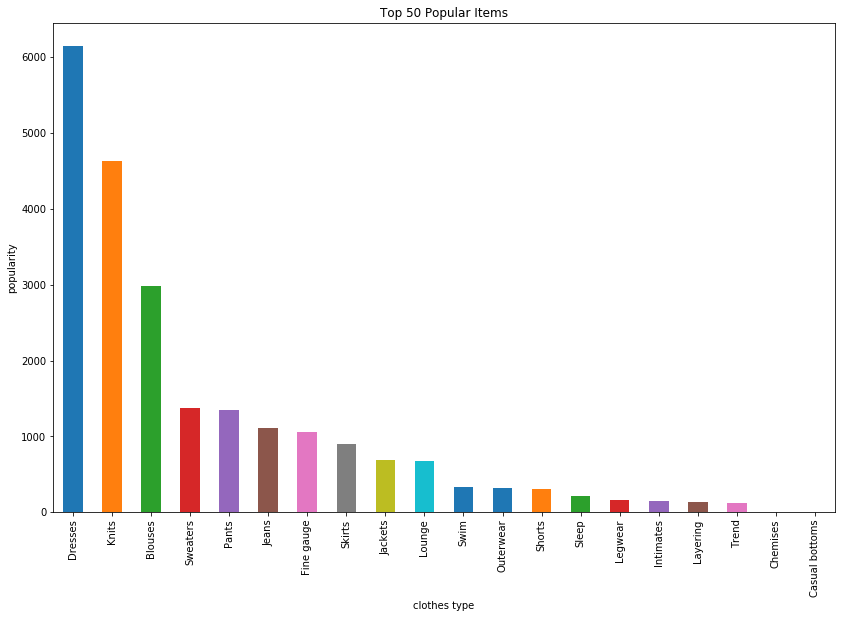

In [4]:
# 1- The most popular item:

fig = plt.figure(figsize=(14, 9))
plt.xticks(rotation=45)
plt.xlabel('clothes type')
plt.ylabel('popularity')
plt.title("Top 50 Popular Items")
df['clothes type'].value_counts()[:50].plot(kind='bar');

In [5]:
df = df[df['Rating'] != 3]
df['customer feedback'] = df['Rating'] >=4
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommendation,Positive Feedback Count,Division Name,Product Category,clothes type,reviews,customer feedback
0,767,33,Love it!,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Love it! - Absolutely wonderful - silky and se...,True
1,1080,34,Love it!,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Love it! - Love this dress! it's sooo pretty....,True
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"My favorite buy! - I love, love, love this jum...",True
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Flattering shirt - This shirt is very flatteri...,True
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,Not for the very petite - I love tracy reese d...,False


In [6]:
###Set True customer feedback  as positive review and False as negative review
positive_reviews = df[df['customer feedback'] == True]
negative_reviews = df[df['customer feedback'] == False]

In [7]:


def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

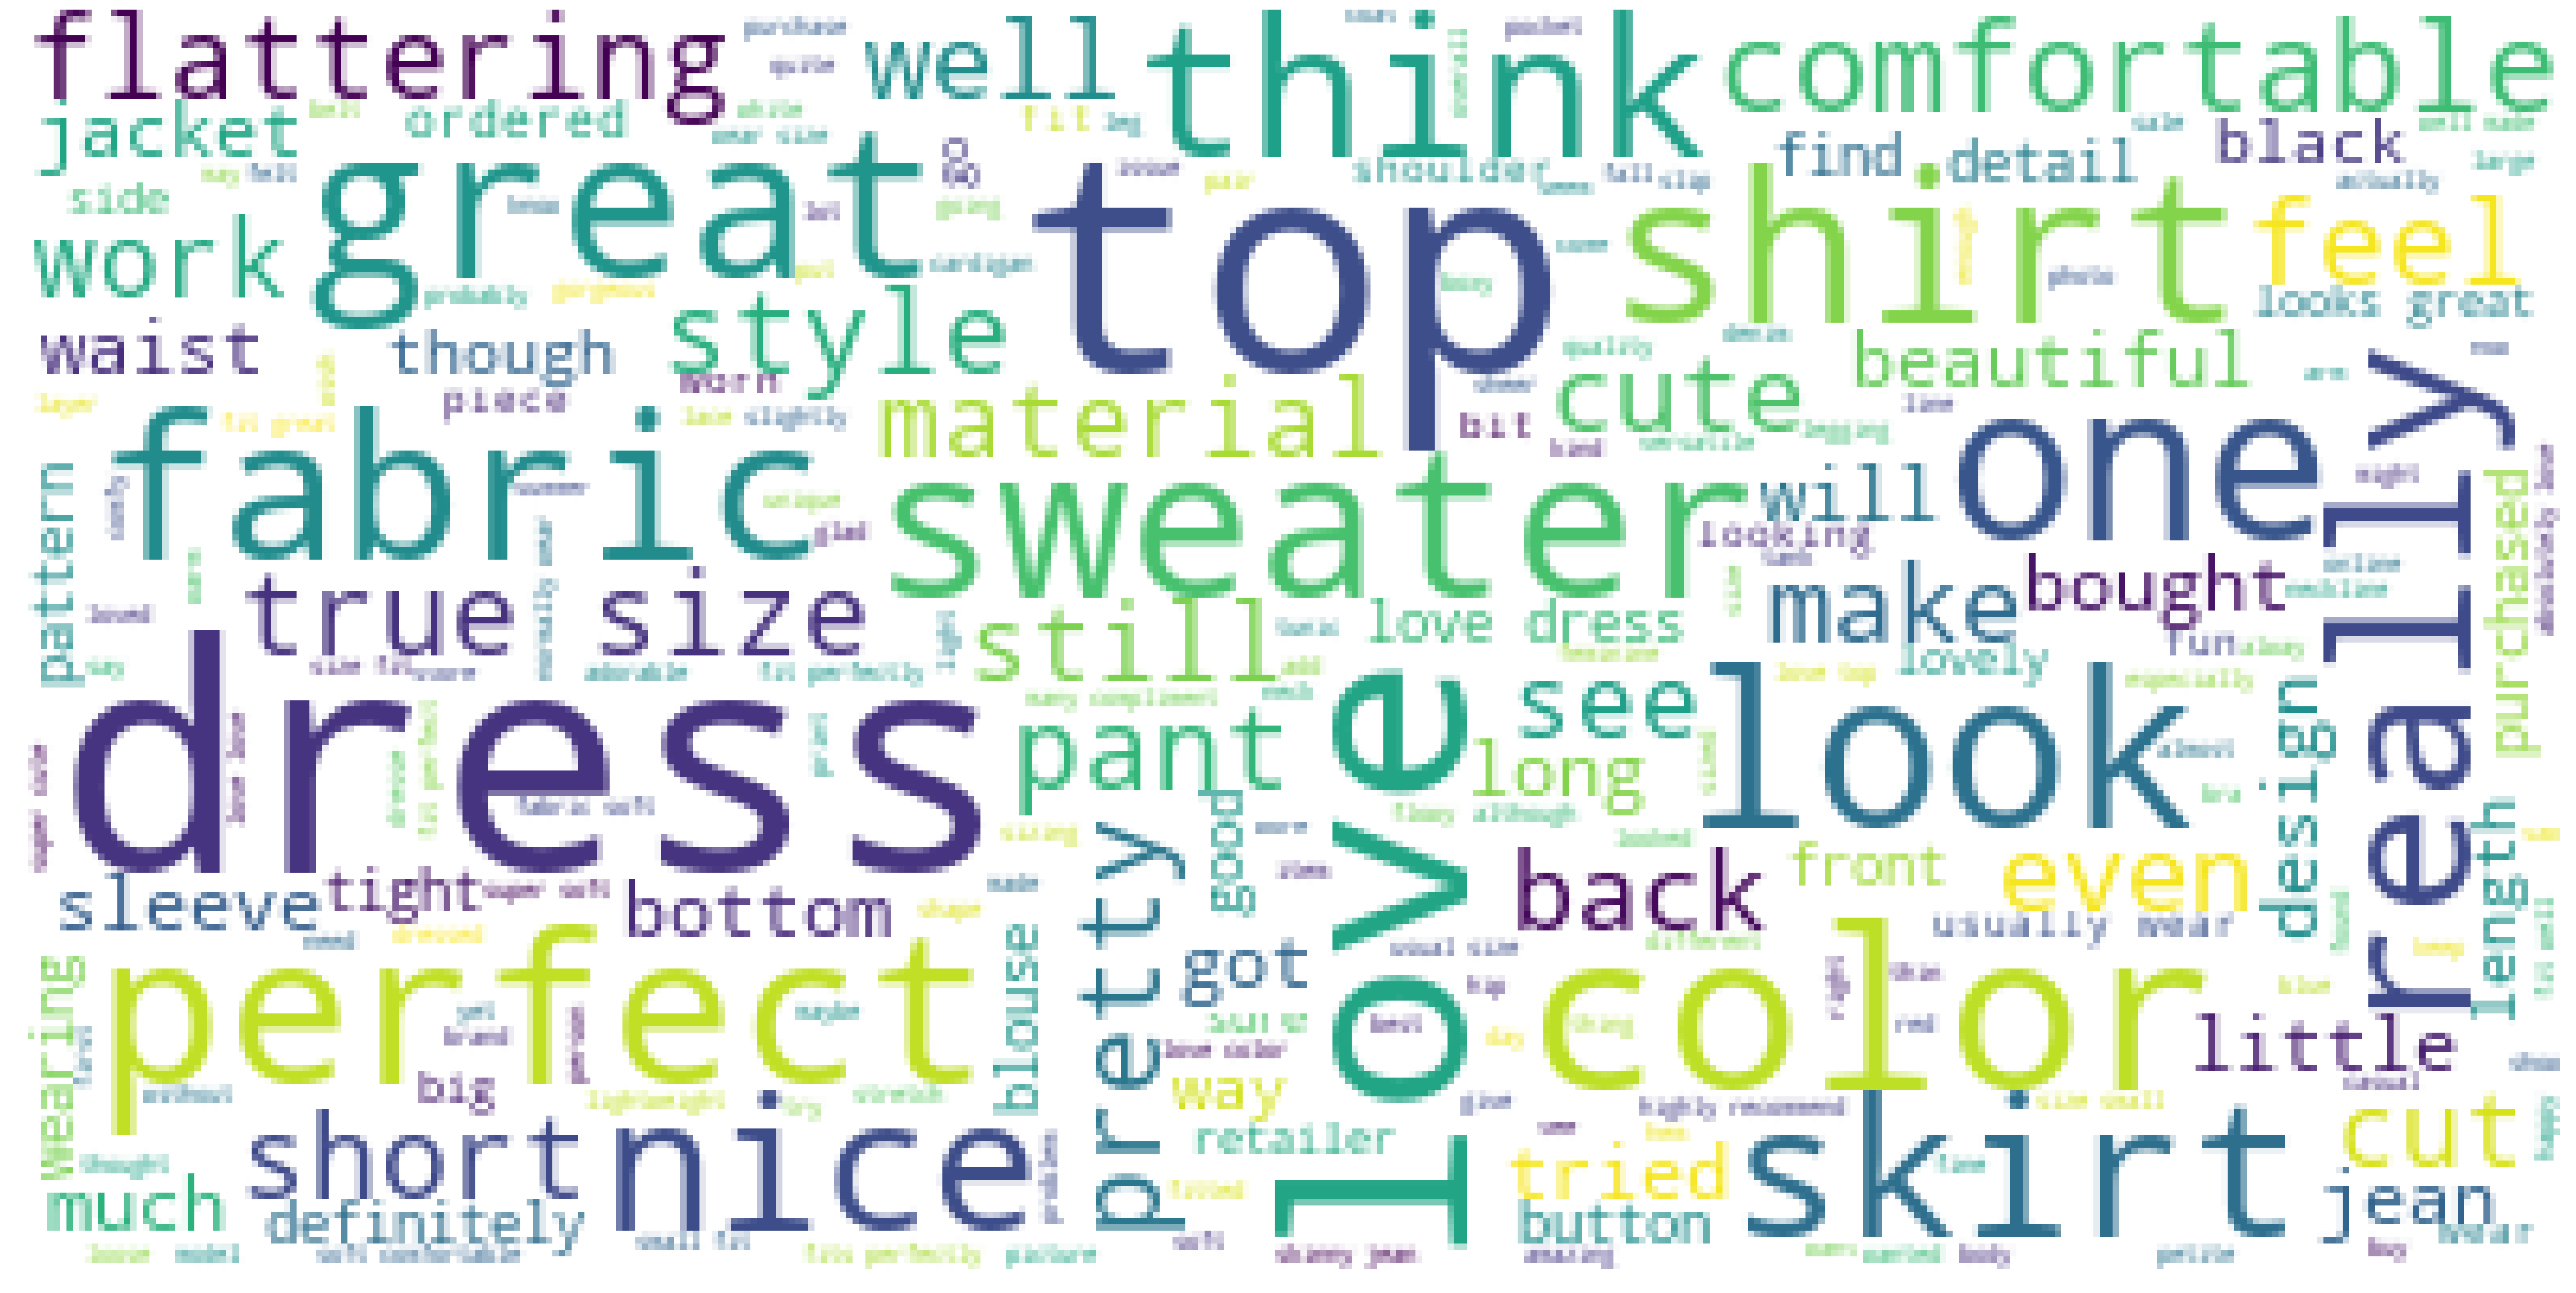

In [8]:
wc(positive_reviews['Review Text'],'white','Most Used Words')

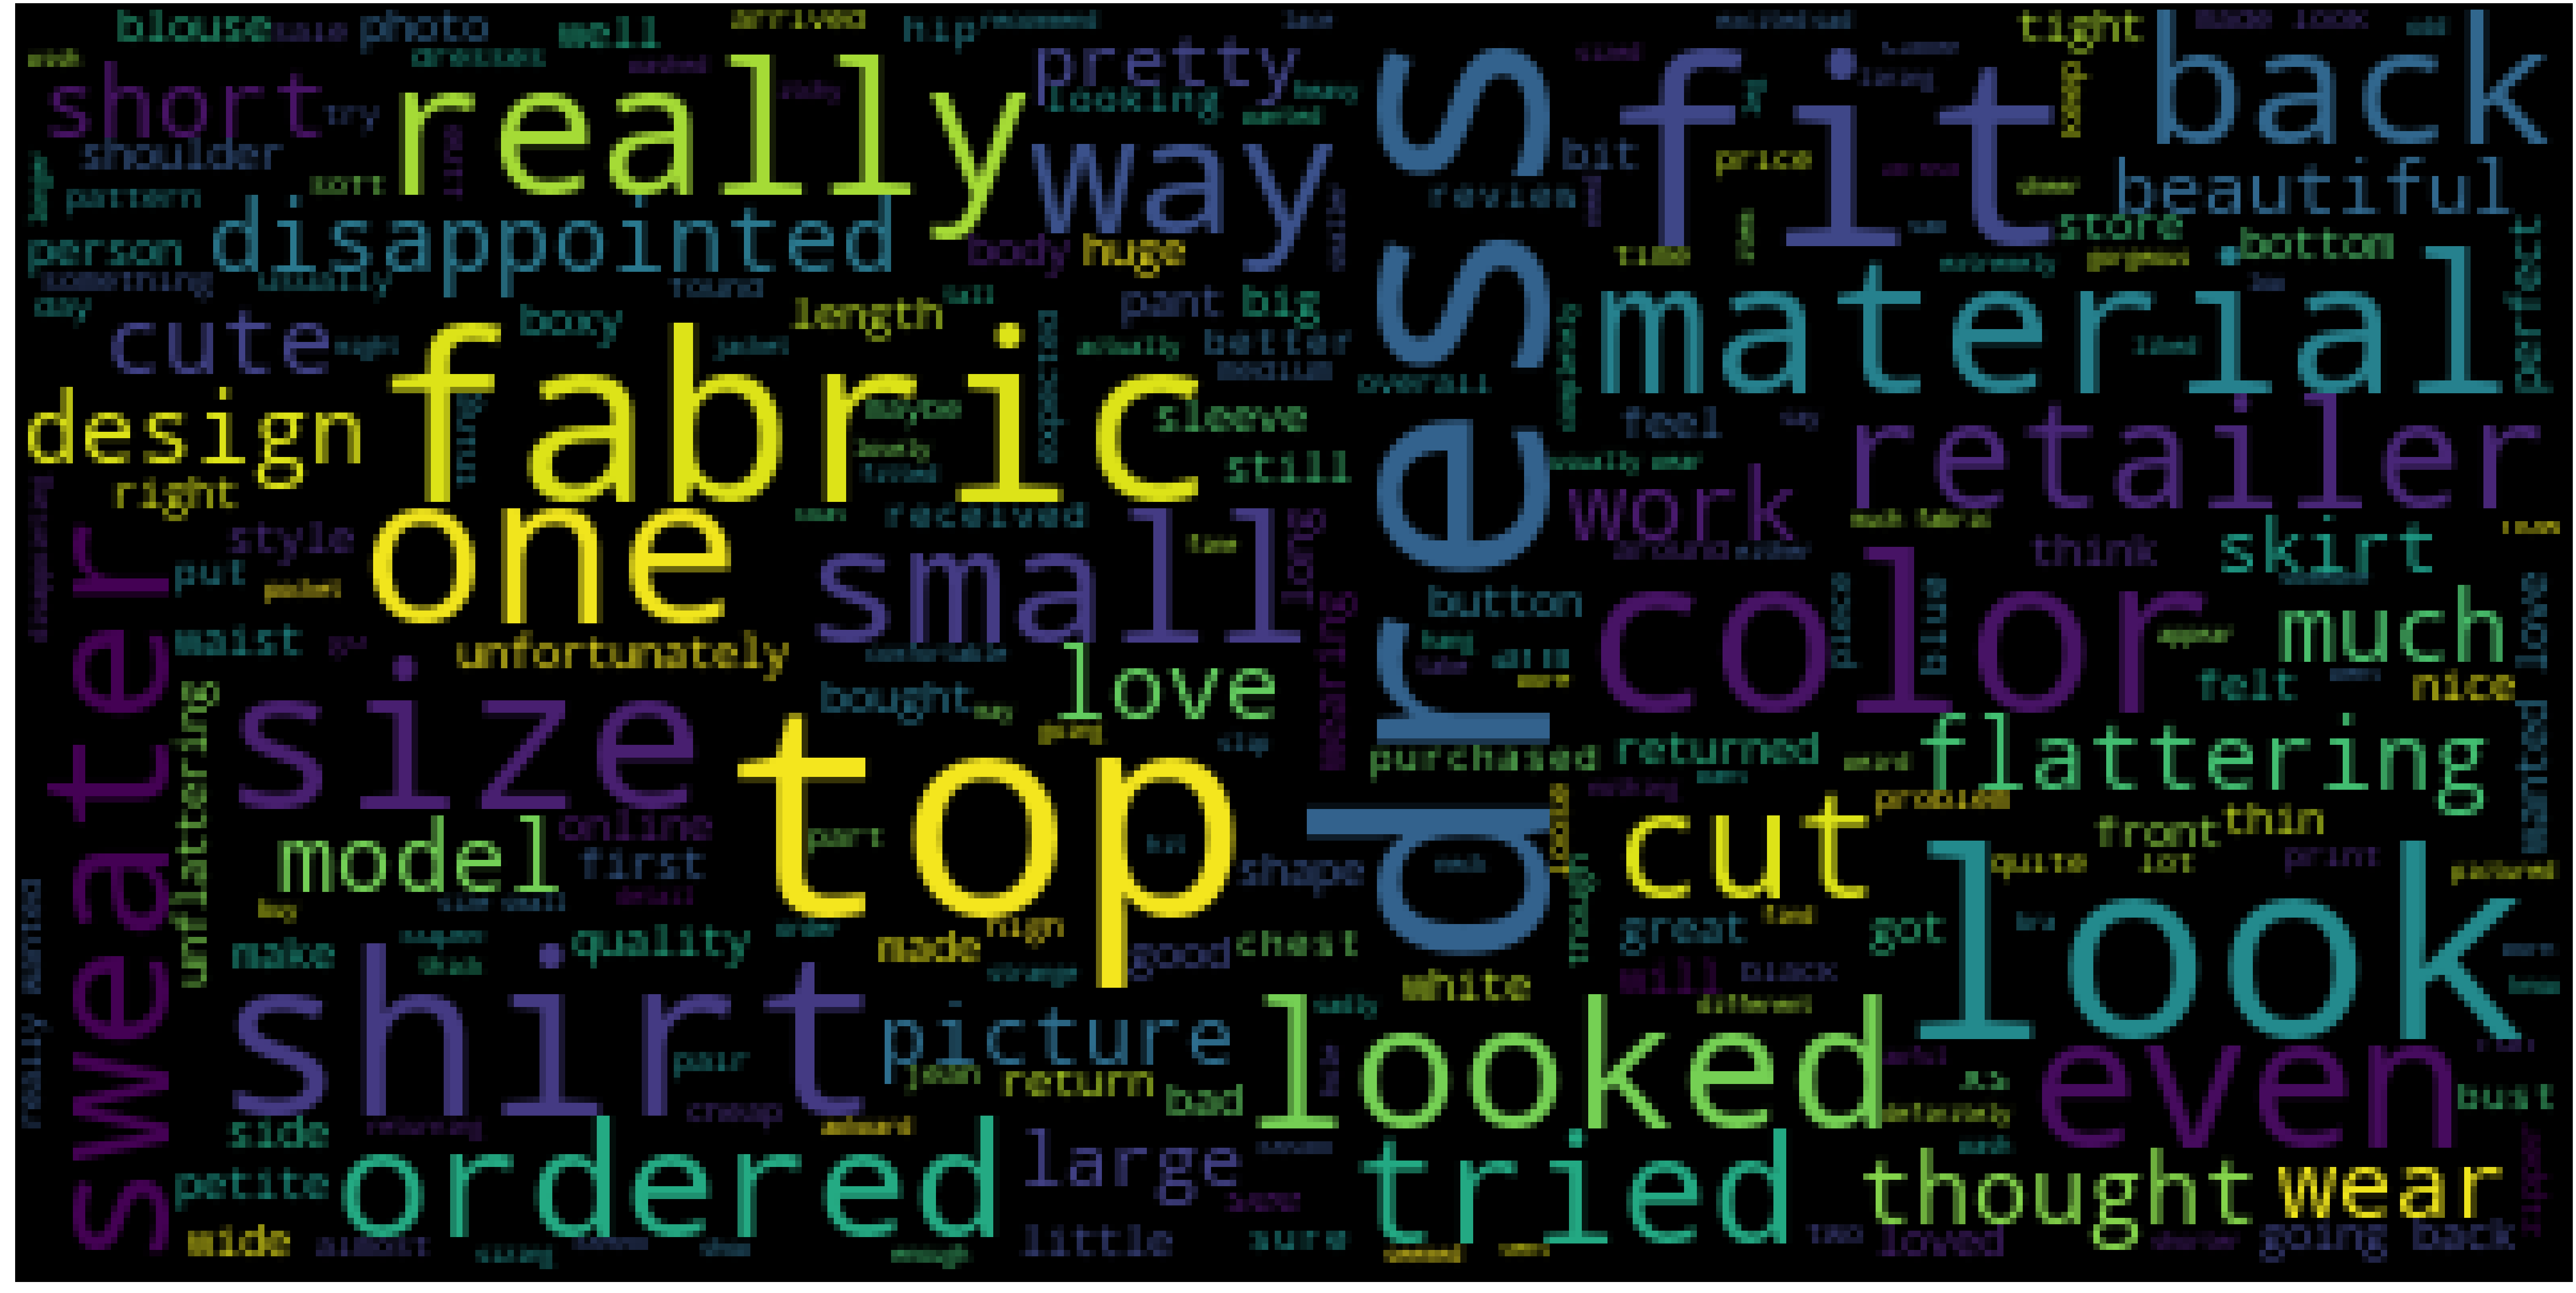

In [9]:
wc(negative_reviews['Review Text'],'black','Most Used Words')

# 2- Sentiment analysis:

Sentiment function of text returns two properties, polarity, and subjectivity.

- Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. 

- Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].


In [10]:
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommendation', 'Positive Feedback Count', 'Division Name',
       'Product Category', 'clothes type', 'reviews', 'customer feedback'],
      dtype='object')

In [11]:
#Let’s check the sentiment of our customers:
from textblob import TextBlob

# Defining a sentiment analyser function
def sentiment_analyser(text):
    return text.apply(lambda Text: pd.Series(TextBlob(Text).sentiment.polarity))

# Applying function to reviews
df['Polarity'] = sentiment_analyser(df['Review Text'])
df.head(10)

,Clothing ID,Age,Title,Review Text,Rating,Recommendation,Positive Feedback Count,Division Name,Product Category,clothes type,reviews,customer feedback,Polarity
0,767,33,Love it!,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Love it! - Absolutely wonderful - silky and se...,True,0.633333
1,1080,34,Love it!,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Love it! - Love this dress! it's sooo pretty....,True,0.339583
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"My favorite buy! - I love, love, love this jum...",True,0.550000
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Flattering shirt - This shirt is very flatteri...,True,0.512891
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,Not for the very petite - I love tracy reese d...,False,0.178750
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,Cagrcoal shimmer fun - I aded this in my baske...,True,0.133750
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits,"Shimmer, surprisingly goes with lots - I order...",True,0.171635
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses,Flattering - I love this dress. i usually get ...,True,0.002500
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses,"Such a fun dress! - I'm 5""5' and 125 lbs. i or...",True,0.204200
11,1095,39,Love it!,This dress is perfection! so pretty and flatte...,5,1,2,General Petite,Dresses,Dresses,Love it! - This dress is perfection! so pretty...,True,0.250000


In [12]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Pre-Processing
SIA = SentimentIntensityAnalyzer()
df['Review Text']= df['Review Text'].astype(str)

# Applying Model, Variable Creation
df['Polarity Score'] = df['Review Text'].apply(lambda x: SIA.polarity_scores(x)['compound'])
df['Neutral Score'] = df['Review Text'].apply(lambda x: SIA.polarity_scores(x)['neu'])
df['Negative Score'] = df['Review Text'].apply(lambda x: SIA.polarity_scores(x)['neg'])
df['Positive Score'] = df['Review Text'].apply(lambda x: SIA.polarity_scores(x)['pos'])

# Converting 0 to 1 Decimal Score to a Categorical Variable
df['Sentiment'] = ''
df.loc[df['Polarity Score'] > 0, 'Sentiment'] = 'Positive'
df.loc[df['Polarity Score'] == 0, 'Sentiment'] = 'Neutral'
df.loc[df['Polarity Score'] < 0, 'Sentiment'] = 'Negative'

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/leen/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [13]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommendation,Positive Feedback Count,Division Name,Product Category,clothes type,reviews,customer feedback,Polarity,Polarity Score,Neutral Score,Negative Score,Positive Score,Sentiment
0,767,33,Love it!,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Love it! - Absolutely wonderful - silky and se...,True,0.633333,0.8932,0.272,0.000,0.728,Positive
1,1080,34,Love it!,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Love it! - Love this dress! it's sooo pretty....,True,0.339583,0.9729,0.664,0.000,0.336,Positive
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"My favorite buy! - I love, love, love this jum...",True,0.550000,0.5727,0.340,0.226,0.434,Positive
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Flattering shirt - This shirt is very flatteri...,True,0.512891,0.9291,0.700,0.000,0.300,Positive
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,Not for the very petite - I love tracy reese d...,False,0.178750,0.9419,0.853,0.000,0.147,Positive


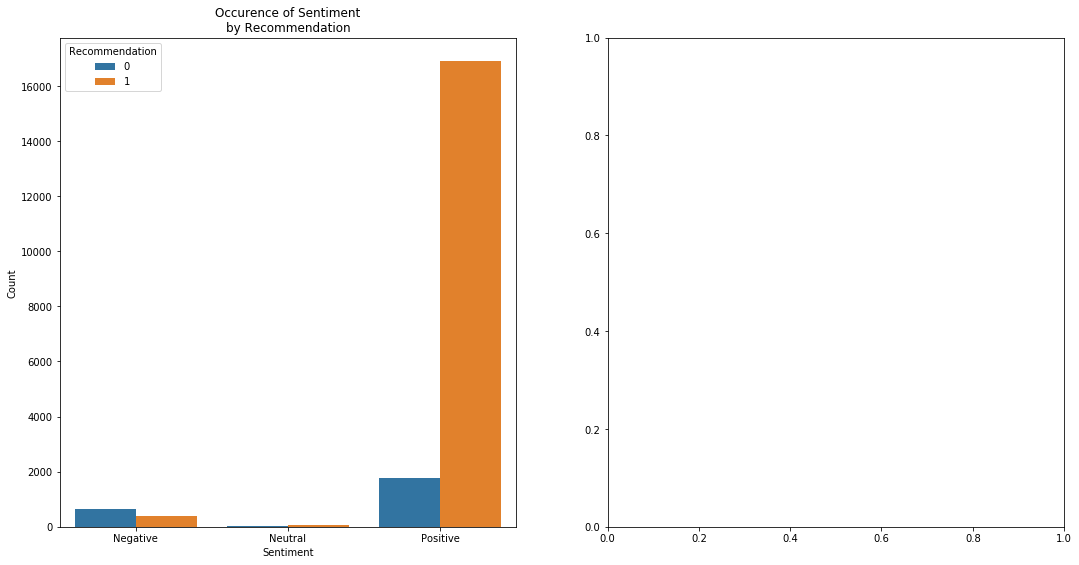

In [14]:
# Normalize Plots for Sentiment Distribution

import seaborn as sns
huevar = 'Recommendation'
xvar = 'Sentiment'
f, axes = plt.subplots(1, 2, figsize=(18, 9))
sns.countplot(x=xvar, hue=huevar,data=df, ax=axes[0], order=['Negative', 'Neutral', 'Positive'])
axes[0].set_title('Occurence of {}\nby {}'.format(xvar, huevar))
axes[0].set_ylabel('Count')

plt.show()

I'll categorise the Age into separate bins (10-20], (20-30] etc, because based on the ratings and sentiments of each age group, the company can tailor its marketing strategies accordingly or provide a more unique shopping experience for each age group, assuming that women in the same age group tend to share some similarities.

In [15]:
bins = np.arange(0,100,10)
df['Age group'] = pd.cut(df['Age'], bins)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommendation,Positive Feedback Count,Division Name,Product Category,clothes type,reviews,customer feedback,Polarity,Polarity Score,Neutral Score,Negative Score,Positive Score,Sentiment,Age group
0,767,33,Love it!,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Love it! - Absolutely wonderful - silky and se...,True,0.633333,0.8932,0.272,0.000,0.728,Positive,"(30, 40]"
1,1080,34,Love it!,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Love it! - Love this dress! it's sooo pretty....,True,0.339583,0.9729,0.664,0.000,0.336,Positive,"(30, 40]"
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"My favorite buy! - I love, love, love this jum...",True,0.550000,0.5727,0.340,0.226,0.434,Positive,"(40, 50]"
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Flattering shirt - This shirt is very flatteri...,True,0.512891,0.9291,0.700,0.000,0.300,Positive,"(40, 50]"
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,Not for the very petite - I love tracy reese d...,False,0.178750,0.9419,0.853,0.000,0.147,Positive,"(40, 50]"


In [16]:
# let's check the rate of recommendations:
recommended = df[df['Recommendation']==1]
not_recommended = df[df['Recommendation']==0]

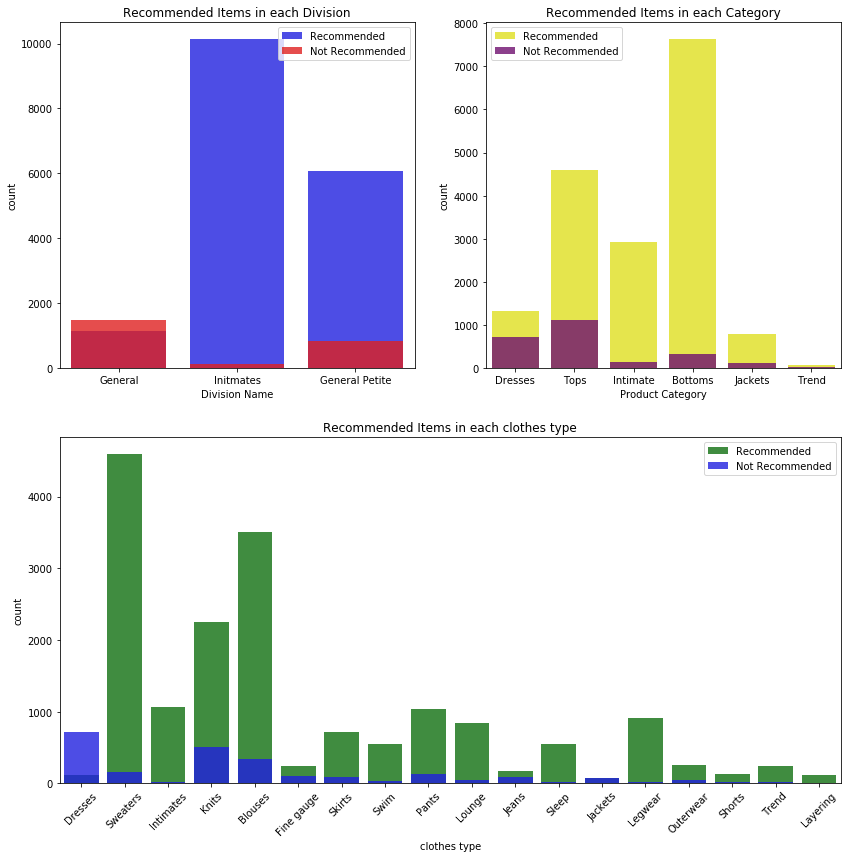

In [17]:
fig = plt.figure(figsize=(14, 14))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = sns.countplot(recommended['Division Name'], color = "blue", alpha = 0.8, label = "Recommended")
ax1 = sns.countplot(not_recommended['Division Name'], color = "red", alpha = 0.8, label = "Not Recommended")
ax1 = plt.title("Recommended Items in each Division")
ax1 = plt.legend()

ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2 = sns.countplot(recommended['Product Category'], color="yellow", alpha = 0.8, label = "Recommended")
ax2 = sns.countplot(not_recommended['Product Category'], color="purple", alpha = 0.8, label = "Not Recommended")
ax2 = plt.title("Recommended Items in each Category")
ax2 = plt.legend()

ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3 = plt.xticks(rotation=45)
ax3 = sns.countplot(recommended['clothes type'], color="green", alpha = 0.8, label = "Recommended")
ax3 = sns.countplot(not_recommended['clothes type'], color="blue", alpha = 0.8, label = "Not Recommended")
ax3 = plt.title("Recommended Items in each clothes type")
ax3 = plt.legend()

It is obvious that every thing related to Dresses category and dresses type need to be reconsidered, it has the highest Not Recommended percentage.